Exercice 1: mettre le downsizing et upsampling dans des fonction a part

In [0]:
import numpy as np

def downsizing(u):
  m = int(np.floor(len(u)/2))
  v = np.zeros((m),float)
  v[0:m] = (u[0:2*m-1:2] + u[1:2*m:2])/2
  return v

def upsizingH(m,u):
  v = np.zeros((m))
  v[0:m] = (u[0:2*m-1:2]-u[1:2*m:2])/2
  return v

def haarl_1d_inv(u):
	v= np.zeros((len(u)),float)
	v= np.copy(u)
	w= np.zeros((len(u)))
	m=1

	while m < len(u):
		w[0:2*m:2] = ( v[0:m] + v[m:2*m])
		w[1:2*m:2] = ( v[0:m] - v[m:2*m])
		v[0:2*m] = w[0:2*m]
		m=2*m
	return v

def haarl_dir(u):
  if (len(u) == 1):
    return u
  else :
    m = int(np.floor(len(u)/2))
    ds = downsizing(u) # Calcule des moyennes
    us = upsizingH(m,u) # Upsizing
    return np.concatenate((haarl_dir(ds), us))

On vérifie si les fonctions fonctionne.

In [2]:
def ex1(n):
	x= np.zeros((n))
	for i in range (n):
		x[i] = i+1
	return x

size= 128
tab = ex1(size)
print(haarl_1d_inv(haarl_dir(tab)))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128.]


Exercice 2: ajout de la transformer Quadradique non linéaire

In [0]:
import numpy as np




def downsizingQ(u):
  m = int(len(u)/2)
  v = np.zeros((m))
  v[0:m] = (u[0:2*m-1:2] + u[1:2*m:2])/2
  return v

#Détails

def upsizingQN(v,uM):
    m = (len(v))//2
    g = np.zeros((m))
    c = np.zeros((m))
    d = np.zeros((m))
    concat = np.concatenate((uM,uM))
    res = np.zeros((m))
    if m > 1 :
        g[0:m] = np.absolute(concat[(m-2)%(2*m):(2*m-2)%(2*m)] - concat[(m-1)%(2*m):(2*m-1)%(2*m)]) + np.absolute(concat[(m-1)%(2*m):(2*m-1)%(2*m)] - concat[m%(2*m):(2*m)])
        c[0:m] = np.absolute(concat[(m-1)%(2*m):(2*m-1)%(2*m)] - concat[m:2*m]) + np.absolute(concat[0:m] - concat[1:m+1])
        d[0:m] = np.absolute(concat[0:m] - concat[1:m+1]) + np.absolute(concat[1:m+1] - concat[2:m+2])
    y = np.zeros((m))
    for i in range(m):
        if g[i] < c[i] and g[i] < d[i]:
            y[i] =  (uM[i]*(5/8)) + (uM[( i-1)%m]/2) -(uM[(i-2)%m]/8)
        elif d[i] < c[i] and d[i] < g[i]:
            y[i] = (uM[i]*(11/8)) - (uM[(i+1)%m]/2) + (uM[(i+2)%m]/8)
        else: 
            y[i] = uM[i] - (uM[(i-1)%m] - uM[(i+1)%m])/8
    res[0:m] = v[0:2*m:2] - y[0:m] 
    return res


### Fonction Directe
def QNLPerDir(X):
        if len(X) == 1 :
            return X #Cas d'arrÃªt : si la taille de la liste=1, on renvoi celle-ci
        else :
            ds = downsizing(X) # Calcule des moyennes
            us = upsizingQN(X,ds) # Calcule des dÃ©tails
            return np.concatenate((QNLPerDir(ds),us)) # On rappelle la fonction avec les moyennes.

def QNLPerInv(x):
  n=1
  i=1 
  x2 = np.copy([x[0]])  
  m = len(x)
  while(n<= m/2):
      concat = np.concatenate((x2,x2))
      x1b=np.zeros((n))
      x1p=np.zeros((n))
      x1=np.zeros((2*n))
      g = np.zeros((n)) 
      c = np.zeros((n)) 
      d = np.zeros((n)) 
      if n > 1 :
          p = 2*n
          g[0:n] = np.abs(concat[(n-2)%p:(2*n-2)%p]-concat[(n-1)%p:(2*n-1)%p]) + np.abs(concat[(n-1)%p:(2*n-1)%p]-concat[0:n])
          c[0:n] = np.abs(concat[(n-1)%p:(2*n-1)%p]-concat[0:n]) + np.abs(concat[0:n]-concat[1:n+1])
          d[0:n] = np.abs(concat[0:n]-concat[1:n+1])+np.abs(concat[1:n+1]-concat[2:n+2])
      y = np.zeros((n))
      for i in range(n):
          if g[i]<c[i] and g[i]<d[i] :
              y[i] = (x2[i]*(5/8)) + (x2[(i-1)%n]/2) -(x2[(i-2)%n]/8)
          elif d[i]<c[i] and d[i]<g[i] :  
              y[i] = (x2[i]*(11/8)) - (x2[(i+1)%n]/2) + (x2[(i+2)%n]/8)
          else : 
              y[i] = x2[i] - (x2[(i-1)%n] - x2[(i+1)%n])/8
      x1b[0:n] = y[0:n] + x[n:2*n]
      x1p[0:n] = 2*x2[0:n]-x1b[0:n]
      for i in range(n):
          x1[0:2*n-1:2] = x1b[0:n]
          x1[1:2*n:2] = x1p[0:n]
      i=i+n
      x2 = np.copy(x1)
      n = len(x2)
  return x1


Exercice 3: On verifie si les definition fonctionne bien avec 3 exemple.

In [0]:
#sin() est périodique a 2*Pi donc sin(K*2Pi) = sin(2Pi) or sin(2Pi) = 0 donc l'exemple 3 renvoie une matrice rempli a moitié de 0 et l'autre de 0.5 
def ex3(n):
	x= np.zeros((n))
	for i in range (int(n/2), n):
		x[i] = 0.5
	return x

def ex1(n):
	x= np.zeros((n))
	for i in range (n):
		x[i] = i+1
	return x

#On prend x le vecteur d'une image et on décide de prendre les n premiere valeur
#si n est plus grand que la taille du vecteur de l'image on laisse des 0 dans le vecteur retourner
def ex2(n,x):
  v= np.zeros((n))
  if n < len(x):    
    for i in range(0,n):
      v[i] = x[i]
  else:
    for i in range(0,len(x)):
      v[i] = x[i]
  return v

### Changer la valeur de size a votre convenance
size = 64
tab1 = ex1(size)
img = [78,15,47,96,12,45,125,147,12,58,78,45,12,12,47,15,48,78,210,45,87,95,21,36,78,147,63,14,25,35,14,78,111,46,85,21,74,36,52,52,52,14,174,175,177,68,71,68,74,7,6,255,48,65,74,25,14,25,36,45,178,251,200,142,130,48,0,0,0,2,15,50,67,182]
tab2 = ex2(size,img)
tab3 = ex3(size)

In [5]:
print(tab1)
print(QNLPerInv(QNLPerDir(tab1)))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]


In [0]:
print(tab2)
print(QNLPerInv(QNLPerDir(tab2)))

[ 78.  15.  47.  96.  12.  45. 125. 147.]
[ 78.  15.  47.  96.  12.  45. 125. 147.]


In [0]:
print(tab1)
print(QNLPerInv(QNLPerDir(tab2)))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128.]
[ 78.  15.  47.  96.  12.  45. 125. 147.  12.  58.  78.  45.  12.  12.
  47.  15.  48.  78. 210.  45.  87.  95.  21.  36.  78. 147.  63.  14.
  25.  35.  14.  78. 111.  46.  85.  21.  74.  36.  52.  52.  52.  14.
 174. 175. 177.  68.  71.  68.  74.   7.   6.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

Exercice 4: Sueillage et comparaison.

In [0]:
def sueillage(x,T):
	y= np.copy(x)
	y[np.absolute(y)<=T]=0
	return y

quad1 = QNLPerDir(tab1)
quad2 = QNLPerDir(tab2)
quad3 = QNLPerDir(tab3)
haar1 = haarl_1d_direct(tab1)
haar2 = haarl_1d_direct(tab2)
haar3 = haarl_1d_direct(tab3)

In [0]:
print(sueillage(quad1,12))
print(sueillage(haar1,12))

[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]


In [0]:
print(sueillage(quad1,128))
print(sueillage(haar1,128))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(sueillage(quad2,12))
print(sueillage(haar2,12))

[ 51.265625    0.          0.         37.15625    21.6875      0.
 -17.1875     21.3828125 -30.359375   31.953125    0.         20.984375
   0.         18.609375    0.          0.          0.        -52.40625
 -28.90625   -15.28125   -47.53125    33.71875    47.34375     0.
   0.          0.        -76.0625     17.3125      0.          0.
   0.          0.         48.9375    -22.25      -35.75      -52.1875
   0.          0.          0.          0.          0.        102.6875
   0.        -26.375     -61.1875     19.3125      0.        -24.9375
  22.6875     33.125      19.125       0.         12.25      -13.375
  38.25        0.         19.8125      0.          0.          0.
   0.          0.          0.          0.       ]
[ 51.265625   0.         0.        37.15625   17.875      0.
 -20.125      0.         0.        13.375     17.75      18.75
   0.         0.         0.         0.       -12.5      -53.75
 -13.25       0.       -32.25      31.25      37.         0.
  12.75       0.

In [0]:
print(sueillage(quad2,128))
print(sueillage(haar2,128))

In [0]:
print(sueillage(quad3,12))
print(sueillage(haar3,12))

In [0]:
print(sueillage(quad3,128))
print(sueillage(haar3,128))

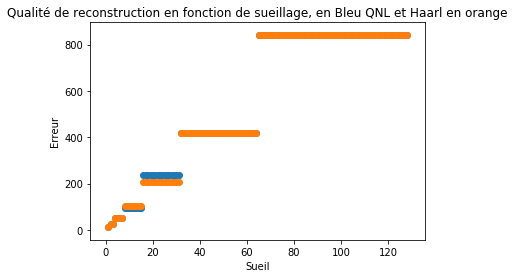

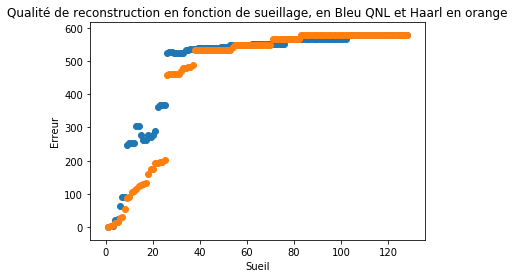

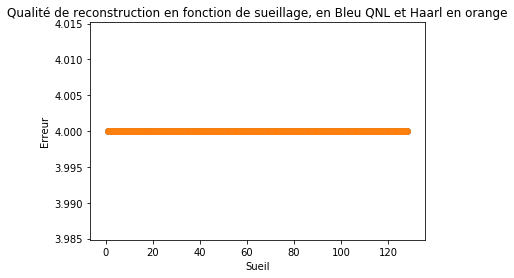

In [0]:
import matplotlib.pyplot as plt

def normeL2(x,y):
    if len(x)!=len(y):
        print("Les deux vecteurs on des tailles différente")
    else:
        n=len(x)
        v=0
        for i in range(n):
            v=v + np.square(np.absolute(x[i]-y[i]))
        v= np.sqrt(v)
        return v
      
t = ex1(size)
tab1 = ex1(size)
img = [78,15,47,96,12,45,125,147,12,58,78,45,12,12,47,15,48,78,210,45,87,95,21,36,78,147,63,14,25,35,14,78,111,46,85,21,74,36,52,52,52,14,174,175,177,68,71,68,74,7,6]
tab2 = ex2(size,img)
tab3 = ex3(size)

###############################################################
###############################################################

tab4 = np.zeros((size))
tab5 = np.zeros((size))

for i in range(size+1):
  tab4[i-1] = normeL2(tab1,QNLPerInv(sueillage(quad1,i)))
  tab5[i-1] = normeL2(tab1,haarl_1d_inv(sueillage(haar1,i)))

plt.scatter(t,tab4)
plt.scatter(t,tab5)
plt.title('Qualité de reconstruction en fonction de sueillage, en Bleu QNL et Haarl en orange')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

###############################################################
###############################################################

tab4 = np.zeros((size))
tab5 = np.zeros((size))

for i in range(size+1):
  tab4[i-1] = normeL2(tab2,QNLPerInv(sueillage(quad2,i)))
  tab5[i-1] = normeL2(tab2,haarl_1d_inv(sueillage(haar2,i)))

plt.scatter(t,tab4)
plt.scatter(t,tab5)
plt.title('Qualité de reconstruction en fonction de sueillage, en Bleu QNL et Haarl en orange')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

###############################################################
###############################################################

tab4 = np.zeros((size))
tab5 = np.zeros((size))

for i in range(size+1):
  tab4[i-1] = normeL2(tab3,QNLPerInv(sueillage(quad3,i)))
  tab5[i-1] = normeL2(tab3,haarl_1d_inv(sueillage(haar3,i)))

plt.scatter(t,tab4)
plt.scatter(t,tab5)
plt.title('Qualité de reconstruction en fonction de sueillage, en Bleu QNL et Haarl en orange')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()